# Clustering 聚类

## 分解聚类
[代码](Machine-Learning-basic/K-means/decomposition_clustering.py)

## k-means
[code](Machine-Learning-basic/K-means/k-means.py)

In [1]:
import numpy as np
from copy import deepcopy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
data_no = 1

N = 0 # data number
D = 0 # data dimesions
iris = 'K-means/iris.txt'
text_Data = 'text_data.txt'
if(data_no == 1):
    file_name = iris
    N = 150 # data number
    D = 4 # data dimesions
elif(data_no == 3):
    file_name = 'iris2.txt'
    N = 100
    D = 4
else:
    file_name = text_Data
    N = 21
    D = 2
raw_data_file = open(file_name,'r')
raw_data = raw_data_file.readlines()



data_mat = np.zeros((N,D))
lable_mat = np.zeros((N,1))
arritubutes = []
data_len = D + 1 #data dim plus label
lable_dic = {'Iris-setosa' :0, 'Iris-versicolor':1, 'Iris-virginica':2}
k = 3 # k classes
for i, data in enumerate(raw_data):
    #print(i)
    #print(data)
    data_list = data.split(',')
    arritubutes = [float(x) for i, x in  enumerate(data_list) if(i < D)]
    data_mat[i] = arritubutes
    #lable_mat[i] = lable_dic[data_list[-1].strip('\n')]
    #print(data_mat[i])
    #data_mat.row_stack(data_list[:data_len-2])
    #lable_mat.row_stack(data_list[-1])
print("data shape: {} , lable shape : {}".format(data_mat.shape, lable_mat.shape))
predict_label = np.zeros(lable_mat.shape,dtype = np.int32)
N_list = []
#Objective_E = np.array(150)
N_list.append(N)
N_list.append(0)
N_list.append(0)
init_data_index = list(range(0,N,1))
G_dic = {'0' : init_data_index, '1' : [], '2' :[]}

#current_G1_mat = data_mat.copy()
#current_G2_mat = np.zeros(data_mat.shape)

# x_mean_1 = np.mean(current_G1_mat, axis = 0) # x^(k+1)
# x_mean_2 = np.mean(current_G2_mat, axis = 0)
# print(x_mean_1)
# print(x_mean_2)

max_E_index = np.inf
max_E_last = 0
max_E = 0
iter = 0
# new idea use a dic{[]}  to store 3 classes' index
#[0~149] [] [] , then change this 
#for k_i in range(k - 1):
#print(G_dic[str(0)])
#print(len(G_dic[str(0)]))
for k in range(2):
    iter += 1
    max_E_index = np.inf
    max_E_last = 0
    max_E = 0
    print("data mat shape {}".format(data_mat.shape))
    #print(x_mean_1)
    #print(x_mean_2)

    while(1):
        current_G1_mat = data_mat[G_dic[str(k)],: ].copy().reshape((len(G_dic[str(k)]), D))
        current_G2_mat = data_mat[G_dic[str(k+1)],:].copy()
        if(not len(G_dic[str(k+1)]) == 0):
            current_G2_mat = current_G2_mat.reshape((len(G_dic[str(k+1)]), D))
        else:
            current_G2_mat = np.zeros((1,D))
        if(iter > 2):
            print(current_G1_mat.shape)
            print(current_G2_mat)
        #print("G1 mat:{}".format(current_G1_mat))
        #print("G2 mat :{}".#format(current_G2_mat))
        #print(current_G1_mat)
        #print( np.mean(current_G1_mat, axis = 0))
        x_mean_1 = np.mean(current_G1_mat, axis = 0) # x^(k+1)
        x_mean_2 = np.mean(current_G2_mat, axis = 0)
        #print("x k mean : ")
        #print(x_mean_1)
        #print(x_mean_2)
        #print("***********")
        #max_E = len(G_dic[str(k)])*len(G_dic[str(k+1)]) / (len(G_dic[str(k)]) + len(G_dic[str(k+1)]))*((x_mean_1 - x_mean_2).T) * (x_mean_1 - x_mean_2)
        #max_E = np.sqrt(np.sum(max_E ** 2))
        max_E = len(G_dic[str(k)])*len(G_dic[str(k+1)]) / (len(G_dic[str(k)]) + len(G_dic[str(k+1)]))*np.sum((x_mean_1 - x_mean_2)**2)
        #print("current E:  {}".format(max_E))
        max_E_index = np.inf
        if(iter >2):
            print("max E init :{}".format(max_E))
        for i, x_index in enumerate(G_dic[str(k)]):
            #iter += 1
            x_data = data_mat[x_index]
            #print("x:{} index: {}".format(x_data,x_index))
            G_dic_temp = deepcopy(G_dic)
            G_dic_temp[str(k)].remove(x_index)
            G_dic_temp[str(k+1)].append(x_index)
            # temp_G1_mat = data_mat[G_dic_temp[str(k)], :].copy()
            # temp_G2_mat = data_mat[G_dic_temp[str(k+1)] , :].copy()
            # temp_G1_mat = temp_G1_mat.reshape((len(G_dic_temp[str(k)]), D))
            # temp_G2_mat = temp_G2_mat.reshape((len(G_dic_temp[str(k+1)]), D))
            #print(temp_G1_mat)
            #print(temp_G2_mat)
            #print(temp_G1_mat.shape)
            #print(temp_G2_mat)
            x_mean_1_temp = x_mean_1 + (x_mean_1 - x_data)/ (len(G_dic[str(k)]) -1)
            x_mean_2_temp = x_mean_2 - (x_mean_2 - x_data)/ ( len(G_dic[str(k+1)]) + 1)
            #print(x_mean_1_temp)
            # if(len(G_dic_temp[str(k+1)]) > 1):
                # x_mean_2_temp = x_mean_2 - (x_mean_2 - x_data)/ ( len(G_dic_temp[str(k+1)]) - 1)
            # else:
                # x_mean_2_temp = x_data
            if(iter > 2):
                
            #print(x_mean_2_temp)
                print("x mean: ")
                print(x_mean_1_temp)
                print(x_mean_2_temp)
            #current_E = (len(G_dic_temp[str(k)]))*len(G_dic_temp[str(+1)] )/(len(G_dic_temp[str(k)]) + len(G_dic_temp[str(k+1)]) )*(x_mean_1_temp - x_mean_2_temp).T * (x_mean_1_temp - x_mean_2_temp)
            #print(current_E)
            #current_E = np.sqrt(np.sum(current_E ** 2))
            current_E = (len(G_dic_temp[str(k)]))*len(G_dic_temp[str(k+1)] )/(len(G_dic_temp[str(k)]) + len(G_dic_temp[str(k+1)]) ) *np.sum( (x_mean_1_temp - x_mean_2_temp)**2)
            if(iter > 2):
                print( (len(G_dic_temp[str(k)]), len(G_dic_temp[str(k+1)])))
                print((len(G_dic_temp[str(k)]))*len(G_dic_temp[str(k+1)] )/(len(G_dic_temp[str(k)]) + len(G_dic_temp[str(k+1)]) ))
                print(np.sum( (x_mean_1_temp - x_mean_2_temp)**2))
                print(current_E)
            #print(current_E)
            if current_E > max_E:
                max_E = current_E
                max_E_index = x_index
                
        
        if(max_E < max_E_last or max_E_index == np.inf):
            print(" ********\nfinished : max_E :{}, last_max_E:{}\n************".format(max_E, max_E_last))
            break;
        else:
            #print("\n\ninter: {}, add {}\n\n".format(iter, max_E_index))
            max_E_last = max_E
            #print(G_dic[str(k)])
            G_dic[str(k)].remove(max_E_index)
            G_dic[str(k+1)].append(max_E_index)
            #print(G_dic[str(k)])
            #print(G_dic[str(k+1)])
            #sample_mean = np.mean(current_data_mat, axis = 0)
            #
print(G_dic)


for k in G_dic:
    for ele in G_dic[k]:    
        predict_label[ele] = k
    
    
x_axis = data_mat[:,0]
y_axis = data_mat[:,1]
z_axis = data_mat[:,2]
fig = plt.figure() 
ax = Axes3D(fig) 

ax.scatter(x_axis, y_axis, z_axis, c=predict_label.reshape(150))
# 设置坐标轴显示以及旋转角度
ax.set_xlabel('1') 
ax.set_ylabel('2')
ax.set_zlabel('3')
ax.view_init(elev=10,azim=235)
plt.show()


acc = []
for k in G_dic:
    correct = 0
    for ele in G_dic[k]:
        if( (int(k))*50 <= ele and (int(k)+1) * 50 > ele ):
            correct += 1
    acc.append(correct / len(G_dic[k]))
print(acc)




data shape: (150, 4) , lable shape : (150, 1)
data mat shape (150, 4)
 ********
finished : max_E :528.4556935226608, last_max_E:528.4556935226608
************
data mat shape (150, 4)
 ********
finished : max_E :68.14419921461881, last_max_E:68.14419921461878
************
{'0': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 57, 93, 98], '1': [114, 146, 133, 149, 101, 142, 123, 83, 76, 50, 113, 127, 72, 126, 119, 86, 121, 138, 70, 56, 54, 58, 63, 51, 65, 75, 68, 73, 91, 85, 78, 87, 74, 66, 97, 55, 84, 61, 106, 90, 96, 71, 94, 95, 99, 62, 88, 67, 92, 53, 89, 82, 69, 59, 80, 64, 81, 79, 60], '2': [118, 117, 131, 122, 105, 135, 109, 107, 130, 125, 102, 129, 143, 120, 144, 100, 124, 140, 104, 139, 112, 108, 136, 132, 141, 128, 145, 115, 148, 116, 137, 103, 147, 110, 111, 77, 52, 134]}


<Figure size 640x480 with 1 Axes>

[0.9433962264150944, 0.7627118644067796, 0.9473684210526315]


data shape: (150, 4) , lable shape : (150, 1)
init index:25
init index:74
init index:123
init center:
 [[-1.02184904 -0.1249576  -1.227541   -1.31297673]
 [ 0.67450115 -0.35636057  0.30783301  0.13322594]
 [ 0.55333328 -0.8191665   0.64902723  0.79059079]]
interation : 1	 rel error : 0.15858335252595449
interation : 2	 rel error : 0.0018241257075859475
interation : 3	 rel error : 5.898059818321144e-17
0 class:[25, 17, 10, 46, 42, 9, 2, 28, 38, 31, 37, 27, 16, 49, 41, 4, 44, 15, 7, 1, 18, 5, 19, 33, 45, 14, 12, 22, 36, 13, 6, 40, 30, 21, 8, 25, 35, 43, 47, 0, 20, 48, 39, 24, 29, 11, 26, 3, 32, 34, 23]
 1 class:[74, 83, 64, 96, 93, 67, 101, 73, 74, 114, 66, 119, 90, 53, 95, 91, 58, 134, 88, 97, 57, 142, 99, 80, 79, 94, 68, 63, 87, 121, 106, 82, 138, 72, 54, 60, 133, 84, 61, 89, 81, 62, 92, 149, 113, 55, 98, 126, 59, 78, 71, 69, 146, 123]
 2 class:[123, 112, 105, 147, 104, 129, 75, 56, 110, 137, 115, 136, 77, 86, 135, 51, 118, 117, 109, 148, 120, 76, 108, 102, 85, 103, 127, 144, 145, 70, 

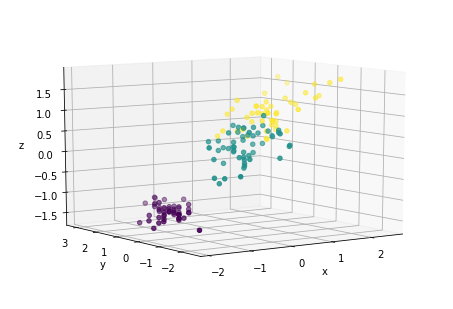

[1.0]
[1.0, 0.7407407407407407]
[1.0, 0.7407407407407407, 0.7708333333333334]
result is : 
[[-1.01472152  0.82334082 -1.30336194 -1.2562629 ]
 [-0.03679913 -0.87058938  0.34679655  0.27930702]
 [ 1.123832    0.07751999  0.98903676  1.01245143]]
[1.0, 0.7407407407407407, 0.7708333333333334]
interation 3 times


In [7]:
import numpy as np
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
def NormalizedStd(data):
    data_mean = np.mean(data, axis = 0)
    data_std = np.std(data, axis = 0)
    return (data - data_mean) / data_std
    
raw_data_file = open('K-means/iris.txt','r')
raw_data = raw_data_file.readlines()
N = 150 # data number
D = 4 # data dimesions
data_mat = np.zeros((N,D))
lable_mat = np.zeros((N,1))
arritubutes = []
data_len = D + 1 #data dim plus label
lable_dic = {'Iris-setosa' :0, 'Iris-versicolor':1, 'Iris-virginica':2}
k = 3 # k classes
for i, data in enumerate(raw_data):
    data_list = data.split(',')
    
    arritubutes = [float(x) for i, x in  enumerate(data_list) if(i < data_len - 1)]
    data_mat[i] = arritubutes
    lable_mat[i] = lable_dic[data_list[-1].strip('\n')]
    #print(data_mat[i])
    #data_mat.row_stack(data_list[:data_len-2])
    #lable_mat.row_stack(data_list[-1])
print("data shape: {} , lable shape : {}".format(data_mat.shape, lable_mat.shape))
data_mat = NormalizedStd(data_mat) 
# pick k centers
init_centers = np.zeros((k,D))
init_center_index = []
for i, index in enumerate(list(range(25,150,49))):
    print("init index:%d"%index)
    init_centers[i] = data_mat[index]
    init_center_index.append(index)
    
next_centers = init_centers.copy()

last_centers  = init_centers.copy()

print("init center:\n {}".format(init_centers))
# k-means part
class_mat = np.zeros(lable_mat.shape)

predict_label = np.zeros(lable_mat.shape,dtype = np.int32)
inter = 0
class_dic = {'0' :[init_center_index[0]], '1':[init_center_index[1]], '2':[init_center_index[2]]}
while(1):
    inter += 1
    last_centers = next_centers.copy()
    random_chose_index = list(range(data_mat.shape[0]))
    random.shuffle(random_chose_index)
    #strat interation
    for i in random_chose_index:
        last_centers_2 = next_centers.copy()
        closed_distance = np.inf
        closed_cls = np.inf
        for j in range(last_centers_2.shape[0]):
            now_distance = np.sum((data_mat[i] - last_centers_2[j])**2)
            if( now_distance < closed_distance):
                closed_distance = now_distance.copy();
                closed_cls = j
                # 第二次迭代开始，改变类别先从原有类中删除
        if(inter > 1):
            #print(class_dic)
            #print(predict_label)
            #print("try to remove {} from {}\n".format(i,predict_label[i][0]))
            class_dic[str(predict_label[i][0])].remove(i)
                       
        class_dic[str(closed_cls)].append(i)
        predict_label[i][0] = closed_cls
        #print(class_dic)
    # update center
    # center_temp = np.zeros((1,4))
        for i in range(k):
            center_temp = np.zeros((1,4))
            for index in (class_dic[str(i)]):
                center_temp += data_mat[index]
            next_centers[i] = center_temp/ (len(class_dic[str(i)]))
    #print("next")
    #print(next_centers)
    #print("last")
    #print(last_centers)
    #print(np.mean(last_centers - next_centers))
    ref_e = abs(np.mean(last_centers - next_centers))
    print("interation : {}\t rel error : {}".format(inter,ref_e))
    if(abs(ref_e) < 1e-5):
        print("0 class:{}\n 1 class:{}\n 2 class:{} \n".format(class_dic['0'], class_dic['1'], class_dic['2']))
        break


def draw_Point_Cloud(Points, Lables, axis = True, **kags):

    x_axis = Points[:,0]
    y_axis = Points[:,1]
    z_axis = Points[:,2]
    fig = plt.figure() 
    ax = Axes3D(fig) 

    ax.scatter(x_axis, y_axis, z_axis, c = Lables)
    # 设置坐标轴显示以及旋转角度
    ax.set_xlabel('x') 
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.view_init(elev=10,azim=235)
    if not axis:
        #关闭显示坐标轴
        plt.axis('off')
    
    plt.show()

draw_Point_Cloud(data_mat, predict_label.reshape(150), axis = True)
acc = []
for k in class_dic:
    correct = 0
    for ele in class_dic[k]:
        if( (int(k))*50 <= ele and (int(k)+1) * 50 > ele ):
            correct += 1
    acc.append(correct / len(class_dic[k]))
    print(acc)
#print(predict_label.reshape(150))
print("result is : \n{}".format(next_centers))
print(acc)
print("interation {} times".format(inter))

